In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving net3.png to net3.png


In [ ]:
uploaded_file_name = next(iter(uploaded_file))
print(uploaded_file_name)

net3.png


In [ ]:
print("画像ファイルと面の色を指定してください")
while True:
  val = input().split()
  if len(val) != 2:
    print('「file_name color」の形式で入力してください')
  elif val[0] != uploaded_file_name:
    print('指定したファイルはアップロードされていません')
  elif val[1] != 'w' and val[1] != 'r'and val[1] != 'o'and val[1] != 'g'and val[1] != 'b'and val[1] != 'y':
    print('第二引数に面の色を指定してください')
  else:
    break;


画像ファイルと面の色を指定してください
2.png y


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(uploaded_file_name)
image = cv2.blur(image,(3,3))

In [ ]:
height, width = image.shape[:2]

#画像の端の4点の画素値が黒か判断
#4点とも黒判定の場合、背景は黒として処理
judge_num = 0
if image[0,0][0] < 80 and image[0,0][1] < 80 and image[0,0][2] < 80:
  judge_num = judge_num + 1
if image[0,width - 1][0] < 80 and image[0,width - 1][1] < 80 and image[0,width - 1][2] < 80:
  judge_num = judge_num + 1
if image[height - 1,0][0] < 80 and image[height - 1,0][1] < 80 and image[height - 1,0][2] < 80:
  judge_num = judge_num + 1
if image[height - 1,width - 1][0] < 80 and image[height - 1,width - 1][1] < 80 and image[height - 1,width - 1][2] < 80:
  judge_num = judge_num + 1

In [ ]:
lower = np.array([0,0,0])
if judge_num == 4:
  upper = np.array([100,100,100])
  print('背景は黒')
else :
  upper =np.array([70,70,70])
  print('背景は白')
green = cv2.inRange(image,lower,upper)

背景は黒


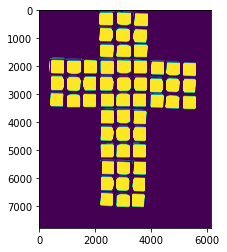

In [ ]:
green = cv2.bitwise_not(green)
plt.imshow(green)

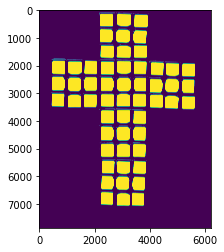

In [ ]:
if judge_num == 4:
  green = cv2.copyMakeBorder(green, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=[0,0,0])  
plt.imshow(green) 

In [ ]:
if judge_num ==4:
  kernelSize = max(1, int(0.01 * max(width, height))) * 2 + 1
  kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  green = cv2.erode(green, kernel) # 収縮
  green = cv2.dilate(green, kernel) # 膨張

  kernelSize = max(1, int(0.05 * max(width, height))) * 2 + 1
  kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  green = cv2.dilate(green, kernel) # 膨張
  green = cv2.erode(green, kernel) # 収縮
else:
  green = cv2.bitwise_not(green)
  #kernelSize = max(1, int(0.002 * max(width, height))) * 2 + 1
  #kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  #green = cv2.erode(green, kernel) # 収縮
  #green = cv2.dilate(green, kernel) # 膨張

  kernelSize = max(1, int(0.075 * max(width, height))) * 2 + 1
  kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  green = cv2.dilate(green, kernel) # 膨張

  kernelSize = max(1, int(0.085 * max(width, height))) * 2 + 1
  kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  green = cv2.erode(green, kernel) # 収縮

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

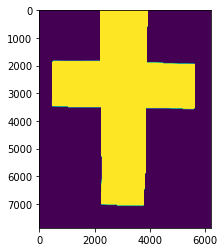

In [ ]:
plt.imshow(green)

In [ ]:
contours, hierarchy = cv2.findContours(green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
if judge_num == 4:
  new_image = cv2.copyMakeBorder(image, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=[0,0,0])
else:
  new_image = image
#cv2.drawContours(new_image, contours, -1, (255, 0, 0), 2, cv2.LINE_AA)
#plt.imshow(new_image)

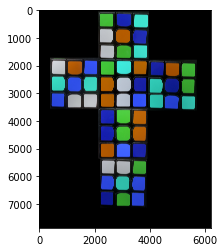

In [ ]:
x, y, w, h = cv2.boundingRect(contours[0])
#cv2.rectangle(new_image, (x, y), (x + w, y + h), (0, 255, 0), cv2.LINE_4)
plt.imshow(new_image)

In [ ]:
# 移動元の4頂点
src = np.array([[x,y], [x + w,y], [x + w,y + h], [x,y + h]], dtype=np.float32)
# 移動先の4頂点
dst = np.array([
    [0, 0],
    [900, 0],
    [900, 1200 ],
    [0, 1200]
], dtype=np.float32)

In [ ]:
# 変換行列
trans = cv2.getPerspectiveTransform(src, dst)
# 射影変換
board = cv2.warpPerspective(new_image, trans, (900, 1200), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

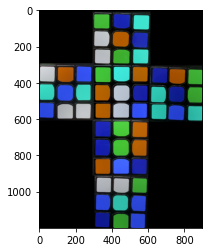

In [ ]:
plt.imshow(board)

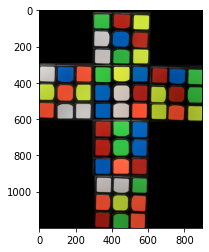

In [ ]:
rgbImage = cv2.cvtColor(board, cv2.COLOR_BGR2RGB)
plt.imshow(rgbImage)

In [ ]:
color_list = (np.zeros(9,dtype=str),np.zeros(9,dtype=str),np.zeros(9,dtype=str),np.zeros(9,dtype=str),np.zeros(9,dtype=str),np.zeros(9,dtype=str))
color_num_list = (np.zeros(9),np.zeros(9),np.zeros(9),np.zeros(9),np.zeros(9),np.zeros(9))
white_list = np.zeros(9,dtype=str)
red_list = np.zeros(9,dtype=str)
orange_list = np.zeros(9,dtype=str)
green_list = np.zeros(9,dtype=str)
blue_list = np.zeros(9,dtype=str)
yellow_list = np.zeros(9,dtype=str)
mix_list = []

for k in range(0,4):
  for i in range(-1,2):
    for j in range(-1,2):
      R = rgbImage[150+i*100+k*300,450+j*100,0]
      G = rgbImage[150+i*100+k*300,450+j*100,1]
      B = rgbImage[150+i*100+k*300,450+j*100, 2]

      if R >150 and G >150 and B >150 and (abs(int(R) - int(B)) < 40 or abs(int(G) - int(B)) < 40):
        color_list[k][4+3*i+j] = 'w'
        print('white')
      elif R >150 and G >150:
        color_list[k][4+3*i+j] = 'y'
        print('yellow')
      elif int(R) - int(G) > 0 and int(R) - int(B) > 0:
        color_list[k][4+3*i+j] = 'm'
        color_num_list[k][4+3*i+j] = int(R) + int(G) + int(B) 
        mix_list.append(int(R) + int(G) + int(B))
        print('red or orange')
      elif int(B) - int(G) > 0 and int(B) - int(R) > 0:
        color_list[k][4+3*i+j] = 'b'
        print('blue')
      elif int(G) - int(R) > 0 and int(G) - int(B) > 0:
        color_list[k][4+3*i+j] = 'g'
        print('green')
      else:
        color_list[k][4+3*i+j] = 'n'
        print('fail')
      print(rgbImage[150+i*100+k*300,450+j*100])

  print(color_list[k][4])    

for k in range(0,2):
  for i in range(-1,2):
    for j in range(-1,2):
      R = rgbImage[450+i*100,150+j*100+k*600,0]
      G = rgbImage[450+i*100,150+j*100+k*600,1]
      B = rgbImage[450+i*100,150+j*100+k*600, 2]

      if R >150 and G >150 and B >150 and (abs(int(R) - int(B)) < 40 or abs(int(G) - int(B)) < 40):
        color_list[k+4][4+3*i+j] = 'w'
        print('white')
      elif R >150 and G >150 and abs(int(R) - int(G) < 60):
        color_list[k+4][4+3*i+j] = 'y'
        print('yellow')
      elif int(R) - int(G) > 0 and int(R) - int(B) > 0:
        color_list[k+4][4+3*i+j] = 'm'
        color_num_list[k+4][4+3*i+j] = int(R) + int(G) + int(B)
        mix_list.append(int(R) + int(G) + int(B))
        print('red or orange')
      elif int(B) - int(G) > 0 and int(B) - int(R) > 0:
        color_list[k+4][4+3*i+j] = 'b'
        print('blue')
      elif int(G) - int(R) > 0 and int(G) - int(B) > 0:
        color_list[k+4][4+3*i+j] = 'g'
        print('green')
      else:
        color_list[k+4][4+3*i+j] = 'n'
        print('fail')
      print(rgbImage[450+i*100,150+j*100+k*600])

  print(color_list[k+4][4])

mix_list = sorted(mix_list)

for i in range(6):
  for j in range(9):
    if color_num_list[i][j] < (mix_list[8] + mix_list[9]) / 2 and color_num_list[i][j] > 0:
      color_list[i][j] = 'r'
    elif color_num_list[i][j] > 0:
      color_list[i][j] = 'o'

for k in range(6): 
  if color_list[k][4] == 'w':
    white_list = color_list[k]
  elif color_list[k][4] == 'r':
    red_list = color_list[k]
  elif color_list[k][4] == 'o':
    orange_list = color_list[k] 
  elif color_list[k][4] == 'g':
    green_list = color_list[k]
  elif color_list[k][4] == 'b':
    blue_list = color_list[k]
  else: 
    yellow_list = color_list[k]

green
[ 58 190  70]
red or orange
[181  38  24]
yellow
[208 229  62]
white
[199 195 192]
blue
[  1  92 181]
red or orange
[178  44  32]
white
[192 187 183]
green
[ 46 174  61]
yellow
[202 222  62]
b
green
[ 54 195  65]
yellow
[218 231  63]
blue
[  3  99 176]
blue
[  0  97 182]
white
[208 195 186]
red or orange
[163  32  24]
blue
[  0  96 180]
white
[207 193 184]
red or orange
[245  80  50]
w
red or orange
[183  39  28]
green
[ 62 205  77]
blue
[  7 101 189]
red or orange
[174  32  22]
green
[ 52 195  69]
blue
[  6  96 182]
blue
[  0  86 173]
red or orange
[255 101  65]
red or orange
[170  37  28]
g
white
[186 181 178]
white
[184 179 176]
green
[ 52 168  61]
red or orange
[221  71  44]
yellow
[170 189  48]
red or orange
[217  72  45]
red or orange
[144  26  16]
green
[ 43 151  50]
red or orange
[210  69  42]
y
white
[206 202 199]
blue
[  4  85 174]
red or orange
[241  82  53]
yellow
[192 214  54]
red or orange
[232  79  47]
yellow
[194 215  60]
red or orange
[224  73  44]
white
[182 181

white ['g' 'y' 'b' 'b' 'w' 'r' 'b' 'w' 'o']
red ['r' 'b' 'g' 'y' 'r' 'g' 'y' 'o' 'y']
orange ['w' 'b' 'o' 'y' 'o' 'y' 'o' 'w' 'w']
green ['r' 'g' 'b' 'r' 'g' 'b' 'b' 'o' 'r']
blue ['g' 'r' 'y' 'w' 'b' 'r' 'w' 'g' 'y']
yellow ['w' 'w' 'g' 'o' 'y' 'o' 'r' 'g' 'o']


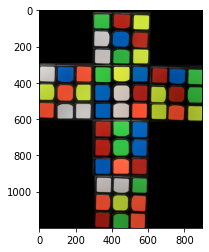

In [ ]:
print('white',white_list)
print('red',red_list)
print('orange',orange_list)
print('green',green_list)
print('blue',blue_list)
print('yellow',yellow_list)
plt.imshow(rgbImage)

white ['o' 'w' 'b' 'r' 'w' 'b' 'b' 'y' 'g']
red ['y' 'o' 'y' 'g' 'r' 'y' 'g' 'b' 'r']
orange ['w' 'w' 'o' 'y' 'o' 'y' 'o' 'b' 'w']
green ['r' 'o' 'b' 'b' 'g' 'r' 'b' 'g' 'r']
blue ['y' 'g' 'w' 'r' 'b' 'w' 'y' 'r' 'g']
yellow ['o' 'g' 'r' 'o' 'y' 'o' 'g' 'w' 'w']


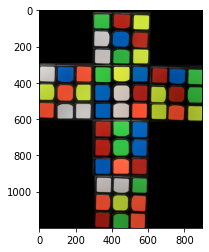

In [ ]:
if color_list[0][4] == 'b':#上面が青の場合，上面が緑になるように配列を変換
  white_list = np.flipud(white_list)
  red_list = np.flipud(red_list)
  orange_list = np.flipud(orange_list)
  green_list = np.flipud(green_list)
  blue_list = np.flipud(blue_list)
  yellow_list = np.flipud(yellow_list)

print('white',white_list)
print('red',red_list)
print('orange',orange_list)
print('green',green_list)
print('blue',blue_list)
print('yellow',yellow_list)
plt.imshow(rgbImage)

In [ ]:
def front_func(front_face,back_face,right_face,left_face,up_face,down_face):
  a = [front_face[0],front_face[1],front_face[2],front_face[5],front_face[8],front_face[7],front_face[6],front_face[3]]
  a_roll = np.roll(a,2)
  front_face[0] = a_roll[0]
  front_face[1] = a_roll[1]
  front_face[2] = a_roll[2]
  front_face[5] = a_roll[3]
  front_face[8] = a_roll[4]
  front_face[7] = a_roll[5]
  front_face[6] = a_roll[6]
  front_face[3] = a_roll[7]

  b =[up_face[6],up_face[7],up_face[8],right_face[0],right_face[3],right_face[6],down_face[2],down_face[1],down_face[0],left_face[8],left_face[5],left_face[2]]
  b_roll = np.roll(b,3)
  up_face[6] = b_roll[0] 
  up_face[7] = b_roll[1]
  up_face[8] = b_roll[2]
  right_face[0] = b_roll[3]
  right_face[3] = b_roll[4]
  right_face[6] = b_roll[5]
  down_face[2] = b_roll[6]
  down_face[1] = b_roll[7]
  down_face[0] = b_roll[8]
  left_face[8] = b_roll[9]
  left_face[5] = b_roll[10]
  left_face[2] = b_roll[11]

  return front_face,back_face,right_face,left_face,up_face,down_face

def back_func(front_face,back_face,right_face,left_face,up_face,down_face):
  a = [back_face[8],back_face[7],back_face[6],back_face[3],back_face[0],back_face[1],back_face[2],back_face[5]]
  a_roll = np.roll(a,2)
  back_face[8] = a_roll[0]
  back_face[7] = a_roll[1]
  back_face[6] = a_roll[2]
  back_face[3] = a_roll[3]
  back_face[0] = a_roll[4]
  back_face[1] = a_roll[5]
  back_face[2] = a_roll[6]
  back_face[5] = a_roll[7]

  b =[up_face[2],up_face[1],up_face[0],left_face[0],left_face[3],left_face[6],down_face[6],down_face[7],down_face[8],right_face[8],right_face[5],right_face[2]]
  b_roll = np.roll(b,3)
  up_face[2] = b_roll[0] 
  up_face[1] = b_roll[1]
  up_face[0] = b_roll[2]
  left_face[0] = b_roll[3]
  left_face[3] = b_roll[4]
  left_face[6] = b_roll[5]
  down_face[6] = b_roll[6]
  down_face[7] = b_roll[7]
  down_face[8] = b_roll[8]
  right_face[8] = b_roll[9]
  right_face[5] = b_roll[10]
  right_face[2] = b_roll[11]
  
  return front_face,back_face,right_face,left_face,up_face,down_face

def right_func(front_face,back_face,right_face,left_face,up_face,down_face):
  a = [right_face[0],right_face[1],right_face[2],right_face[5],right_face[8],right_face[7],right_face[6],right_face[3]]
  a_roll = np.roll(a,2)
  right_face[0] = a_roll[0]
  right_face[1] = a_roll[1]
  right_face[2] = a_roll[2]
  right_face[5] = a_roll[3]
  right_face[8] = a_roll[4]
  right_face[7] = a_roll[5]
  right_face[6] = a_roll[6]
  right_face[3] = a_roll[7]

  b =[up_face[8],up_face[5],up_face[2],back_face[8],back_face[5],back_face[2],down_face[8],down_face[5],down_face[2],front_face[8],front_face[5],front_face[2]]
  b_roll = np.roll(b,3)
  up_face[8] = b_roll[0] 
  up_face[5] = b_roll[1]
  up_face[2] = b_roll[2]
  back_face[8] = b_roll[3]
  back_face[5] = b_roll[4]
  back_face[2] = b_roll[5]
  down_face[8] = b_roll[6]
  down_face[5] = b_roll[7]
  down_face[2] = b_roll[8]
  front_face[8] = b_roll[9]
  front_face[5] = b_roll[10]
  front_face[2] = b_roll[11]
  return front_face,back_face,right_face,left_face,up_face,down_face

def left_func(front_face,back_face,right_face,left_face,up_face,down_face):
  a = [left_face[0],left_face[1],left_face[2],left_face[5],left_face[8],left_face[7],left_face[6],left_face[3]]
  a_roll = np.roll(a,2)
  left_face[0] = a_roll[0]
  left_face[1] = a_roll[1]
  left_face[2] = a_roll[2]
  left_face[5] = a_roll[3]
  left_face[8] = a_roll[4]
  left_face[7] = a_roll[5]
  left_face[6] = a_roll[6]
  left_face[3] = a_roll[7]

  b =[up_face[0],up_face[3],up_face[6],front_face[0],front_face[3],front_face[6],down_face[0],down_face[3],down_face[6],back_face[0],back_face[3],back_face[6]]
  b_roll = np.roll(b,3)
  up_face[0] = b_roll[0] 
  up_face[3] = b_roll[1]
  up_face[6] = b_roll[2]
  front_face[0] = b_roll[3]
  front_face[3] = b_roll[4]
  front_face[6] = b_roll[5]
  down_face[0] = b_roll[6]
  down_face[3] = b_roll[7]
  down_face[6] = b_roll[8]
  back_face[0] = b_roll[9]
  back_face[3] = b_roll[10]
  back_face[6] = b_roll[11]
  return front_face,back_face,right_face,left_face,up_face,down_face

def up_func(front_face,back_face,right_face,left_face,up_face,down_face):
  a = [up_face[0],up_face[1],up_face[2],up_face[5],up_face[8],up_face[7],up_face[6],up_face[3]]
  a_roll = np.roll(a,2)
  up_face[0] = a_roll[0]
  up_face[1] = a_roll[1]
  up_face[2] = a_roll[2]
  up_face[5] = a_roll[3]
  up_face[8] = a_roll[4]
  up_face[7] = a_roll[5]
  up_face[6] = a_roll[6]
  up_face[3] = a_roll[7]

  b =[back_face[6],back_face[7],back_face[8],right_face[2],right_face[1],right_face[0],front_face[2],front_face[1],front_face[0],left_face[2],left_face[1],left_face[0]]
  b_roll = np.roll(b,3)
  back_face[6] = b_roll[0] 
  back_face[7] = b_roll[1]
  back_face[8] = b_roll[2]
  right_face[2] = b_roll[3]
  right_face[1] = b_roll[4]
  right_face[0] = b_roll[5]
  front_face[2] = b_roll[6]
  front_face[1] = b_roll[7]
  front_face[0] = b_roll[8]
  left_face[2] = b_roll[9]
  left_face[1] = b_roll[10]
  left_face[0] = b_roll[11]
  return front_face,back_face,right_face,left_face,up_face,down_face

def down_func(front_face,back_face,right_face,left_face,up_face,down_face):
  a = [down_face[0],down_face[1],down_face[2],down_face[5],down_face[8],down_face[7],down_face[6],down_face[3]]
  a_roll = np.roll(a,2)
  down_face[0] = a_roll[0]
  down_face[1] = a_roll[1]
  down_face[2] = a_roll[2]
  down_face[5] = a_roll[3]
  down_face[8] = a_roll[4]
  down_face[7] = a_roll[5]
  down_face[6] = a_roll[6]
  down_face[3] = a_roll[7]

  b =[front_face[6],front_face[7],front_face[8],right_face[6],right_face[7],right_face[8],back_face[2],back_face[1],back_face[0],left_face[6],left_face[7],left_face[8]]
  b_roll = np.roll(b,3)
  front_face[6] = b_roll[0] 
  front_face[7] = b_roll[1]
  front_face[8] = b_roll[2]
  right_face[6] = b_roll[3]
  right_face[7] = b_roll[4]
  right_face[8] = b_roll[5]
  back_face[2] = b_roll[6]
  back_face[1] = b_roll[7]
  back_face[0] = b_roll[8]
  left_face[6] = b_roll[9]
  left_face[7] = b_roll[10]
  left_face[8] = b_roll[11]
  return front_face,back_face,right_face,left_face,up_face,down_face

In [ ]:
flag = 0 
c = 0 #手数を数える変数
#上段にある注目する色の面の移動
if val[1] == 'w':#揃える面が白色の場合
  for i in range(4):
    for j in range(4 - i):#注目する点が同じ位置になるように回転
      result = front_func(white_list,yellow_list,orange_list,red_list,green_list,blue_list)

    if red_list[2] == 'w' or green_list[6] == 'w' or green_list[7] == 'w':
      if i != 0:
        for j in range(4 - i):
          flag = 1
          print('w f')
          c+=1

    if red_list[2] == 'w':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      c+=14
    elif green_list[6] == 'w':
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      c+=10
    
    if green_list[7] == 'w':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w r')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w d')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w r')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w d')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      c+=21

    for k in range(i):
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      if flag == 1:
        print('w f')
        c+=1
    flag = 0

elif val[1] == 'r':#揃える面が赤色の場合
  for i in range(4):
    for j in range(4 - i):#注目する点が同じ位置になるように回転
      result = left_func(white_list,yellow_list,orange_list,red_list,green_list,blue_list)

    if yellow_list[6] == 'r' or green_list[0] == 'r' or green_list[3] == 'r':
      if i != 0:
        for j in range(4 - i):
          flag = 1
          print('r f')
          c+=1

    if yellow_list[6] == 'r':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      c+=14
    elif green_list[0] == 'r':
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      c+=10
    
    if green_list[3] == 'r':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r r')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r d')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r r')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r r')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r d')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      c+=21

    for k in range(i):
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      if flag == 1:
        print('r f')
        c+=1
    flag = 0

elif val[1] == 'o':#揃える面がオレンジ色の場合
  for i in range(4):
    for j in range(4 - i):#注目する点が同じ位置になるように回転
      result = right_func(white_list,yellow_list,orange_list,red_list,green_list,blue_list)

    if white_list[2] == 'o' or green_list[8] == 'o' or green_list[5] == 'o':
      if i != 0:
        for j in range(4 - i):
          flag = 1
          print('o f')
          c+=1

    if white_list[2] == 'o':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      c+=14
    elif green_list[8] == 'o':
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      c+=10
    
    if green_list[5] == 'o':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o r')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o d')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o r')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o r')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o d')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      c+=21

    for k in range(i):
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      if flag == 1:
        print('o f')
        c+=1
    flag = 0

elif val[1] == 'g':#揃える面が緑色の場合
  for i in range(4):
    for j in range(4 - i):#注目する点が同じ位置になるように回転
      result = up_func(white_list,yellow_list,orange_list,red_list,green_list,blue_list)

    if red_list[0] == 'g' or yellow_list[6] == 'g' or yellow_list[7] == 'g':
      if i != 0:
        for j in range(4 - i):
          flag = 1
          print('g f')
          c+=1

    if red_list[0] == 'g':
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      c+=14

    elif yellow_list[6] == 'g':
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      c+=10
    
    if yellow_list[7] == 'g':
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g r')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g d')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g d')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g d')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g r')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g d')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      c+=21

    for k in range(i):
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      if flag == 1:
        print('g f')
        c+=1
    flag = 0

elif val[1] == 'b':#揃える面が青色の場合
  for i in range(4):
    for j in range(4 - i):#注目する点が同じ位置になるように回転
      result = down_func(white_list,yellow_list,orange_list,red_list,green_list,blue_list)

    if red_list[8] == 'b' or white_list[6] == 'b' or white_list[7] == 'b':
      if i != 0:
        for j in range(4 - i):
          flag = 1
          print('b f')
          c+=1

    if red_list[8] == 'b':
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      c+=14

    elif white_list[6] == 'b':
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      c+=10

    if white_list[7] == 'b':
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b r')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b d')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b d')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b d')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b r')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b d')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      c+=21

    for k in range(i):
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      if flag == 1:
        print('b f')
        c+=1
    flag = 0

elif val[1] == 'y':#揃える面が黄色の場合
  for i in range(4):
    for j in range(4 - i):#注目する点が同じ位置になるように回転
      result = back_func(white_list,yellow_list,orange_list,red_list,green_list,blue_list)

    if red_list[6] == 'y' or blue_list[6] == 'y' or blue_list[7] == 'y':
      if i != 0:
        for j in range(4 - i):
          flag = 1
          print('y f')
          c+=1

    if red_list[6] == 'y':
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      c+=14

    elif blue_list[6] == 'y':
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      c+=10
    
    if blue_list[7] == 'y':
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y r')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y d')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y d')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y d')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y r')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      c+=21

    for k in range(i):
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      if flag == 1:
        print('y f')
        c+=1
    flag = 0

y l
y l
y l
y b
y l
y u
y b
y u
y u
y u
y f
y f
y f
y u
y u
y u
y f
y b
y b
y b
y r
y u
y d
y d
y d
y r
y r
y d
y u
y u
y u
y f
y f
y f
y f
y f
y l
y l
y l
y b
y l
y u
y b
y u
y u
y u
y f
y f
y f


In [ ]:
flag2 = 0
#下段にある注目する色の面の移動
if val[1] == 'w':#揃える面が白色の場合
  for i in range(4):
    for j in range(4 - i):#注目する点が同じ位置になるように回転
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
  
    if white_list[0] != 'w' or (white_list[1] != 'w' and (red_list[3] =='w' or green_list[1] == 'w' or orange_list[5] == 'w' or blue_list[7] == 'w' or yellow_list[1] == 'w' or yellow_list[3] == 'w' or yellow_list[5] == 'w' or yellow_list[7] == 'w')):
      if i != 0:
        for j in range(4 - i):
          flag = 1
          print('w f')
          c+=1
  
    for k in range(4):
      for l in range(4 - k):
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5]) 
      
      if (white_list[0] != 'w' and (red_list[0] == 'w' or green_list[0] == 'w' or yellow_list[6] == 'w')) or (white_list[1] != 'w' and (green_list[1] == 'w' or yellow_list[7] == 'w')):
        if k != 0:
          for j in range(4 - k):
            flag2 = 1
            print('w b')
            c+=1
      
      if white_list[0] != 'w' and red_list[0] == 'w':
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w b')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w b')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        c+=8
      elif white_list[0] != 'w' and green_list[0] == 'w':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w l')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w l')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        c+=8
      elif white_list[0] != 'w' and yellow_list[6] == 'w':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w l')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w b')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w l')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w b')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        c+=11

      if white_list[1] != 'w' and green_list[1] == 'w':
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w f')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w b')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w b')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w b')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w r')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w f')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w f')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w f')
        c+=11
      elif white_list[1] != 'w' and yellow_list[7] == 'w':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w l')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w r')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w u')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w r')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('w l')
        c+=10
      
      for m in range(k):
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        if flag2 == 1:
          print('w b')
          c+=1
      flag2 = 0

    for n in range(i):
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      if flag == 1:
        print('w f')
        c+=1
    flag = 0

elif val[1] == 'r':#揃える面が赤色の場合
  for i in range(4):
    for j in range(4 - i):#注目する点が同じ位置になるように回転
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
  
    if red_list[0] != 'r' or (red_list[1] != 'r' and (yellow_list[5] =='r' or green_list[5] == 'r' or white_list[5] == 'r' or blue_list[5] == 'r' or orange_list[1] == 'r' or orange_list[3] == 'r' or orange_list[5] == 'r' or orange_list[7] == 'r')):
      if i != 0:
        for j in range(4 - i):
          flag = 1
          print('r f')
          c+=1
  
    for k in range(4):
      for l in range(4 - k):
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5]) 
      
      if (red_list[0] != 'r' and (yellow_list[8] == 'r' or green_list[2] == 'r' or orange_list[2] == 'r')) or (red_list[1] != 'r' and (green_list[5] == 'r' or orange_list[1] == 'r')):
        if k != 0:
          for j in range(4 - k):
            flag2 = 1
            print('r b')
            c+=1
      
      if red_list[0] != 'r' and yellow_list[8] == 'r':
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r b')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r b')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        c+=8

      elif red_list[0] != 'r' and green_list[2] == 'r':
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r l')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r l')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r l')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r l')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        c+=8

      elif red_list[0] != 'r' and orange_list[2] == 'r':
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r l')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r l')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r l')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r b')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r l')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r b')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        c+=11

      if red_list[1] != 'r' and green_list[5] == 'r':
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r f')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r b')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r b')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r b')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r r')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r r')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r r')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r f')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r f')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r f')
        c+=11

      elif white_list[1] != 'r' and orange_list[1] == 'r':
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r l')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r r')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r r')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r r')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r u')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r r')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r l')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r l')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('r l')
        c+=10
      
      for m in range(k):
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        if flag2 == 1:
          print('r b')
          c+=1
      flag2 = 0

    for n in range(i):
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      if flag == 1:
        print('r f')
        c+=1
    flag = 0

elif val[1] == 'o':#揃える面がオレンジ色の場合
  for i in range(4):
    for j in range(4 - i):#注目する点が同じ位置になるように回転
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
  
    if orange_list[0] != 'o' or (orange_list[1] != 'o' and (white_list[3] =='o' or green_list[3] == 'o' or yellow_list[3] == 'o' or blue_list[3] == 'o' or red_list[1] == 'o' or red_list[3] == 'o' or red_list[5] == 'o' or red_list[7] == 'o')):
      if i != 0:
        for j in range(4 - i):
          flag = 1
          print('o f')
          c+=1
  
    for k in range(4):
      for l in range(4 - k):
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5]) 
      
      if (orange_list[0] != 'o' and (white_list[0] == 'o' or green_list[6] == 'o' or red_list[2] == 'o')) or (orange_list[1] != 'o' and (green_list[3] == 'o' or red_list[1] == 'o')):
        if k != 0:
          for j in range(4 - k):
            flag2 = 1
            print('o b')
            c+=1
      
      if orange_list[0] != 'o' and white_list[0] == 'o':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o b')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o b')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        c+=8

      elif orange_list[0] != 'o' and green_list[6] == 'o':
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o l')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o l')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o l')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o l')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        c+=8

      elif orange_list[0] != 'o' and red_list[2] == 'o':
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o l')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o l')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o b')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o l')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o b')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        c+=11

      if orange_list[1] != 'o' and green_list[3] == 'o':
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o f')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o b')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o b')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o b')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o r')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o r')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o f')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o f')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o f')
        c+=11

      elif orange_list[1] != 'o' and red_list[1] == 'o':
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o l')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o r')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o r')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o r')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o u')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o r')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o l')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o l')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('o l')
        c+=10
      
      for m in range(k):
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        if flag2 == 1:
          print('o b')
          c+=1
      flag2 = 0

    for n in range(i):
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      if flag == 1:
        print('o f')
        c+=1
    flag = 0

elif val[1] == 'g':#揃える面が緑色の場合
  for i in range(4):
    for j in range(4 - i):#注目する点が同じ位置になるように回転
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
  
    if green_list[0] != 'g' or (green_list[1] != 'g' and (red_list[7] =='g' or yellow_list[1] == 'g' or orange_list[7] == 'g' or white_list[7] == 'g' or blue_list[1] == 'g' or blue_list[3] == 'g' or blue_list[5] == 'g' or blue_list[7] == 'g')):
      if i != 0:
        for j in range(4 - i):
          flag = 1
          print('g f')
          c+=1
  
    for k in range(4):
      for l in range(4 - k):
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5]) 
      
      if (green_list[0] != 'g' and (red_list[6] == 'g' or yellow_list[0] == 'g' or blue_list[6] == 'g')) or (green_list[1] != 'g' and (yellow_list[1] == 'g' or blue_list[7] == 'g')):
        if k != 0:
          for j in range(4 - k):
            flag2 = 1
            print('g b')
            c+=1
      
      if green_list[0] != 'g' and red_list[6] == 'g':
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g b')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g b')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g b')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g b')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        c+=8

      elif green_list[0] != 'g' and yellow_list[0] == 'g':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g l')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g l')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        c+=8

      elif green_list[0] != 'g' and blue_list[6] == 'g':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g l')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g b')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g l')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g b')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g b')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        c+=11

      if green_list[1] != 'g' and yellow_list[1] == 'g':
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g f')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g b')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g b')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g b')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g r')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g f')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g f')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g f')
        c+=11

      elif green_list[1] != 'g' and blue_list[7] == 'g':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g l')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g r')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g u')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g r')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('g l')
        c+=10
      
      for m in range(k):
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        if flag2 == 1:
          print('g b')
          c+=1
      flag2 = 0

    for n in range(i):
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      if flag == 1:
        print('g f')
        c+=1
    flag = 0

elif val[1] == 'b':#揃える面が青色の場合
  for i in range(4):
    for j in range(4 - i):#注目する点が同じ位置になるように回転
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
  
    if blue_list[0] != 'b' or (blue_list[1] != 'b' and (red_list[1] =='b' or white_list[1] == 'b' or orange_list[1] == 'b' or yellow_list[7] == 'b' or green_list[1] == 'b' or green_list[3] == 'b' or green_list[5] == 'b' or green_list[7] == 'b')):
      if i != 0:
        for j in range(4 - i):
          flag = 1
          print('b f')
          c+=1
  
    for k in range(4):
      for l in range(4 - k):
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5]) 
      
      if (blue_list[0] != 'b' and (red_list[2] == 'b' or white_list[0] == 'b' or green_list[6] == 'b')) or (blue_list[1] != 'b' and (white_list[1] == 'b' or green_list[7] == 'b')):
        if k != 0:
          for j in range(4 - k):
            flag2 = 1
            print('b b')
            c+=1
      
      if blue_list[0] != 'b' and red_list[2] == 'b':
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b b')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b b')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        c+=8

      elif blue_list[0] != 'b' and white_list[0] == 'b':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b l')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b l')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        c+=8

      elif blue_list[0] != 'b' and green_list[6] == 'b':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b l')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b b')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b l')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b b')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        c+=11

      if blue_list[1] != 'b' and white_list[1] == 'b':
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b f')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b b')
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b b')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b r')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b f')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b f')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b f')
        c+=11

      elif blue_list[1] != 'b' and green_list[7] == 'b':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b l')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b r')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b u')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b r')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('b l')
        c+=10
      
      for m in range(k):
        result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
        if flag2 == 1:
          print('b b')
          c+=1
      flag2 = 0

    for n in range(i):
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      if flag == 1:
        print('b f')
        c+=1
    flag = 0

elif val[1] == 'y':#揃える面が黄色の場合
  for i in range(4):
    for j in range(4 - i):#注目する点が同じ位置になるように回転
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
  
    if yellow_list[0] != 'y' or (yellow_list[1] != 'y' and (red_list[5] =='y' or blue_list[1] == 'y' or orange_list[3] == 'y' or green_list[7] == 'y' or white_list[1] == 'y' or white_list[3] == 'y' or white_list[5] == 'y' or white_list[7] == 'y')):
      if i != 0:
        for j in range(4 - i):
          flag = 1
          print('y f')
          c+=1
  
    for k in range(4):
      for l in range(4 - k):
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5]) 
      
      if (yellow_list[0] != 'y' and (red_list[8] == 'y' or blue_list[0] == 'y' or white_list[6] == 'y')) or (yellow_list[1] != 'y' and (blue_list[1] == 'y' or white_list[7] == 'y')):
        if k != 0:
          for j in range(4 - k):
            flag2 = 1
            print('y b')
            c+=1
      
      if yellow_list[0] != 'y' and red_list[8] == 'y':
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y b')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y b')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y b')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y b')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        c+=8

      elif yellow_list[0] != 'y' and blue_list[0] == 'y':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y l')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y l')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        c+=8

      elif yellow_list[0] != 'y' and white_list[6] == 'y':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y l')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y b')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y l')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y b')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y b')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        c+=11

      if yellow_list[1] != 'y' and blue_list[1] == 'y':
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y f')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y b')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y b')
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y b')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y r')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y f')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y f')
        result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y f')
        c+=11

      elif yellow_list[1] != 'y' and white_list[7] == 'y':
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y l')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y r')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y r')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y u')
        result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y r')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y l')
        result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
        print('y l')
        c+=10
      
      for m in range(k):
        result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
        if flag2 == 1:
          print('y b')
          c+=1
      flag2 = 0

    for n in range(i):
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      if flag == 1:
        print('y f')
        c+=1
    flag = 0

y b
y b
y u
y f
y b
y b
y b
y r
y r
y r
y f
y f
y f
y b
y b
y f
y f
y f
y b
y u
y b
y b
y b
y u
y u
y u
y f
y f
y f
y b
y b
y b
y b
y u
y b
y b
y b
y u
y u
y u
y b
y b
y b
y l
y r
y r
y r
y u
y u
y r
y l
y l
y l
y b
y b
y f
y f


In [ ]:
flag = 0
#中段にある注目する色の面の移動
if val[1] == 'w':#揃える面が白色の場合
  for i in range(4):
    if white_list[1] != 'w' and red_list[1] == 'w':
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w r')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      c+=12
      
    elif white_list[1] != 'w' and orange_list[1] == 'w':
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      c+=12

    if white_list[3] != 'w' and green_list[3] == 'w':
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w d')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      c+=12

    elif white_list[3] != 'w' and blue_list[3] == 'w':
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      c+=12

    if white_list[5] != 'w' and green_list[5] == 'w':
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w d')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w r')
      c+=12

    elif white_list[5] != 'w' and blue_list[5] == 'w':
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w r')
      c+=12

    if white_list[7] != 'w' and red_list[7] == 'w':
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w r')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w d')
      c+=12

    elif white_list[7] != 'w' and orange_list[7] == 'w':
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('w d')
      c+=12

    if white_list[1] != 'w' or white_list[3] != 'w'  or white_list[5] != 'w'  or white_list[7] != 'w':
      flag = 1

    result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
    if flag == 1:
      print('w f')
      c+=1
    
elif val[1] == 'r':#揃える面が赤色の場合
  for i in range(4):
    if red_list[1] != 'r' and yellow_list[7] == 'r':
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r r')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      c+=12

    elif red_list[1] != 'r' and white_list[1] == 'r':
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      c+=12

    if red_list[3] != 'r' and green_list[1] == 'r':
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r d')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      c+=12

    elif red_list[3] != 'r' and blue_list[7] == 'r':
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      c+=12

    if red_list[5] != 'r' and green_list[7] == 'r':
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r d')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r r')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r r')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r r')
      c+=12

    elif red_list[5] != 'r' and blue_list[1] == 'r':
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r u')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r r')
      c+=12

    if red_list[7] != 'r' and yellow_list[1] == 'r':
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r r')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r r')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r d')
      c+=12

    elif red_list[7] != 'r' and white_list[7] == 'r':
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('r d')
      c+=12

    if red_list[1] != 'r' or red_list[3] != 'r'  or red_list[5] != 'r'  or red_list[7] != 'r':
      flag = 1

    result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
    if flag == 1:
      print('r f')
      c+=1

elif val[1] == 'o':#揃える面がオレンジ色の場合
  for i in range(4):
    if orange_list[1] != 'o' and white_list[1] == 'o':
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      c+=12

    elif orange_list[1] != 'o' and yellow_list[7] == 'o':
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      c+=12

    if orange_list[3] != 'o' and green_list[7] == 'o':
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o d')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      c+=12

    elif orange_list[3] != 'o' and blue_list[1] == 'o':
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      c+=12

    if orange_list[5] != 'o' and green_list[1] == 'o':
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o d')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o r')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o r')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o r')
      c+=12

    elif orange_list[5] != 'o' and blue_list[7] == 'o':
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o u')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o r')
      c+=12

    if orange_list[7] != 'o' and white_list[7] == 'o':
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o r')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o r')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o r')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o d')
      c+=12

    elif orange_list[7] != 'o' and yellow_list[1] == 'o':
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o l')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('o d')
      c+=12

    if orange_list[1] != 'o' or orange_list[3] != 'o'  or orange_list[5] != 'o'  or orange_list[7] != 'o':
      flag = 1

    result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
    if flag == 1:
      print('o f')
      c+=1

elif val[1] == 'g':#揃える面が緑色の場合
  for i in range(4):
    if green_list[1] != 'g' and red_list[3] == 'g':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g r')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      c+=12

    elif green_list[1] != 'g' and orange_list[5] == 'g':
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      c+=12

    if green_list[3] != 'g' and yellow_list[3] == 'g':
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g d')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g d')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      c+=12

    elif green_list[3] != 'g' and white_list[3] == 'g':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      c+=12

    if green_list[5] != 'g' and yellow_list[5] == 'g':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g d')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g r')
      c+=12

    elif green_list[5] != 'g' and white_list[5] == 'g':
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g r')
      c+=12

    if green_list[7] != 'g' and red_list[5] == 'g':
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g r')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result =down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g d')
      c+=12

    elif green_list[7] != 'g' and orange_list[3] == 'g':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g l')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g d')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g d')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('g d')
      c+=12

    if green_list[1] != 'g' or green_list[3] != 'g'  or green_list[5] != 'g'  or green_list[7] != 'g':
      flag = 1

    result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
    if flag == 1:
      print('g f')
      c+=1

elif val[1] == 'b':#揃える面が青色の場合
  for i in range(4):
    if blue_list[1] != 'b' and red_list[5] == 'b':
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b r')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      c+=12

    elif blue_list[1] != 'b' and orange_list[3] == 'b':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      c+=12

    if blue_list[3] != 'b' and white_list[3] == 'b':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b d')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b d')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b d')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      c+=12

    elif blue_list[3] != 'b' and yellow_list[3] == 'b':
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      c+=12

    if blue_list[5] != 'b' and white_list[5] == 'b':
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b r')
      c+=12

    elif blue_list[5] != 'b' and yellow_list[5] == 'b':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b u')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b r')
      c+=12

    if blue_list[7] != 'b' and red_list[3] == 'b':
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b r')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b d')
      c+=12

    elif blue_list[7] != 'b' and orange_list[5] == 'b':
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b l')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b d')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b d')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('b d')
      c+=12

    if blue_list[1] != 'b' or blue_list[3] != 'b'  or blue_list[5] != 'b'  or blue_list[7] != 'b':
      flag = 1

    result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
    if flag == 1:
      print('b f')
      c+=1

elif val[1] == 'y':#揃える面が黄色の場合
  for i in range(4):
    if yellow_list[1] != 'y' and red_list[7] == 'y':
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y r')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      c+=12

    elif yellow_list[1] != 'y' and orange_list[7] == 'y':
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      c+=12

    if yellow_list[3] != 'y' and blue_list[3] == 'y':
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y d')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y d')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y d')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      c+=12

    elif yellow_list[3] != 'y' and green_list[3] == 'y':
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      c+=12

    if yellow_list[5] != 'y' and blue_list[5] == 'y':
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y d')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y r')
      c+=12

    elif yellow_list[5] != 'y' and green_list[5] == 'y':
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = down_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y u')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y r')
      c+=12

    if yellow_list[7] != 'y' and red_list[1] == 'y':
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y r')
      result = right_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y r')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y d')
      c+=12

    elif yellow_list[7] != 'y' and orange_list[1] == 'y':
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = left_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y l')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y f')
      result = front_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y b')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y d')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y d')
      result = up_func(result[0],result[1],result[2],result[3],result[4],result[5])
      print('y d')
      c+=12

    if yellow_list[1] != 'y' or yellow_list[3] != 'y'  or yellow_list[5] != 'y'  or yellow_list[7] != 'y':
      flag = 1

    result = back_func(result[0],result[1],result[2],result[3],result[4],result[5])
    if flag == 1:
      print('y f')
      c+=1

y f
y b
y f
y f
y f
y l
y l
y l
y b
y b
y b
y f
y u
y f
y f
y f


white ['g' 'w' 'w' 'g' 'w' 'r' 'r' 'g' 'b']
red ['r' 'r' 'w' 'g' 'r' 'r' 'o' 'b' 'b']
orange ['o' 'w' 'r' 'w' 'o' 'o' 'w' 'w' 'o']
green ['g' 'b' 'b' 'b' 'g' 'g' 'r' 'o' 'g']
blue ['w' 'o' 'o' 'o' 'b' 'b' 'g' 'r' 'b']
yellow ['y' 'y' 'y' 'y' 'y' 'y' 'y' 'y' 'y']
必要な手数は 122 手です


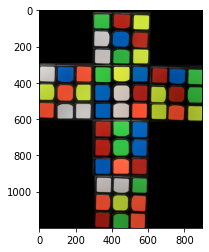

In [ ]:
white_list = result[0]
yellow_list = result[1]
orange_list = result[2]
red_list = result[3]
green_list = result[4]
blue_list = result[5]

if color_list[0][4] == 'b':#変換した配列を元の配列に戻す
  white_list = np.flipud(white_list)
  red_list = np.flipud(red_list)
  orange_list = np.flipud(orange_list)
  green_list = np.flipud(green_list)
  blue_list = np.flipud(blue_list)
  yellow_list = np.flipud(yellow_list)

print('white',white_list)
print('red',red_list)
print('orange',orange_list)
print('green',green_list)
print('blue',blue_list)
print('yellow',yellow_list)
print('必要な手数は', c ,'手です')
plt.imshow(rgbImage)